In [10]:
import openai
import matplotlib.pyplot as plt

In [11]:
# Setting API key
openai.api_key = "<OPENAI KEY HERE>"


In [12]:
# Declare persona space
persona_space = [
    {"age": 20, "occupation": "construction worker"},
    {"age": 60, "occupation": "golfer"},
    {"age": 7, "occupation": "primary school student"},
]

In [13]:
# Store prompts and responses in a list
prompts_responses = []

# Setting maximum number of tokens
maximum_number_of_tokens_for_each_response = 50

# Responses per persona
num_responses_per_persona = 3

# System message for the chat model
system_message = "You are a helpful assistant that provides information about any topic that the user asks you."

In [15]:
for persona in persona_space:
    prompt = f"You are a {persona['age']}-year-old and you are a {persona['occupation']}. List your favorite color among Pink, Yellow, Grey, Purple in the first word of your response and describe it two sentences."
    messages = [
        {"role": "user", "content": prompt},
    ]
    for num_response in range(num_responses_per_persona):
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=maximum_number_of_tokens_for_each_response,
        )
        generated_response = response['choices'][0]['message']['content']

        persona_prompt_response_dict = {
            "persona": persona,
            "prompt": prompt,
            "response": generated_response,
        }

        prompts_responses.append(persona_prompt_response_dict)
    
prompts_responses 

[{'persona': {'age': 20, 'occupation': 'construction worker'},
  'prompt': 'You are a 20-year-old and you are a construction worker. List your favorite color among Pink, Yellow, Grey, Purple in the first word of your response and describe it two sentences.',
  'response': 'Grey - It is a neutral color that exudes elegance and sophistication. I love how it adds a calming and timeless touch to my surroundings.'},
 {'persona': {'age': 20, 'occupation': 'construction worker'},
  'prompt': 'You are a 20-year-old and you are a construction worker. List your favorite color among Pink, Yellow, Grey, Purple in the first word of your response and describe it two sentences.',
  'response': "Grey - It's a cool and neutral color that brings a sense of calmness and sophistication. Its versatility allows it to blend well with various shades, creating a sleek and modern aesthetic."},
 {'persona': {'age': 20, 'occupation': 'construction worker'},
  'prompt': 'You are a 20-year-old and you are a constru

In [16]:
from collections import defaultdict

In [25]:
# Given list of dictionaries 
data = [
    {'persona': {'age': 20, 'occupation': 'construction worker'}, 'response': 'Grey'},
    {'persona': {'age': 20, 'occupation': 'construction worker'}, 'response': 'Grey'},
    {'persona': {'age': 20, 'occupation': 'construction worker'}, 'response': 'Yellow'},
    {'persona': {'age': 60, 'occupation': 'golfer'}, 'response': 'Yellow'},
    {'persona': {'age': 60, 'occupation': 'golfer'}, 'response': 'Grey'},
    {'persona': {'age': 60, 'occupation': 'golfer'}, 'response': 'Purple'},
    {'persona': {'age': 7, 'occupation': 'studfent'}, 'response': 'Purple'},
    {'persona': {'age': 7, 'occupation': 'studfent'}, 'response': 'Pink'},
     {'persona': {'age': 7, 'occupation': 'studfent'}, 'response': 'Pink'},
]

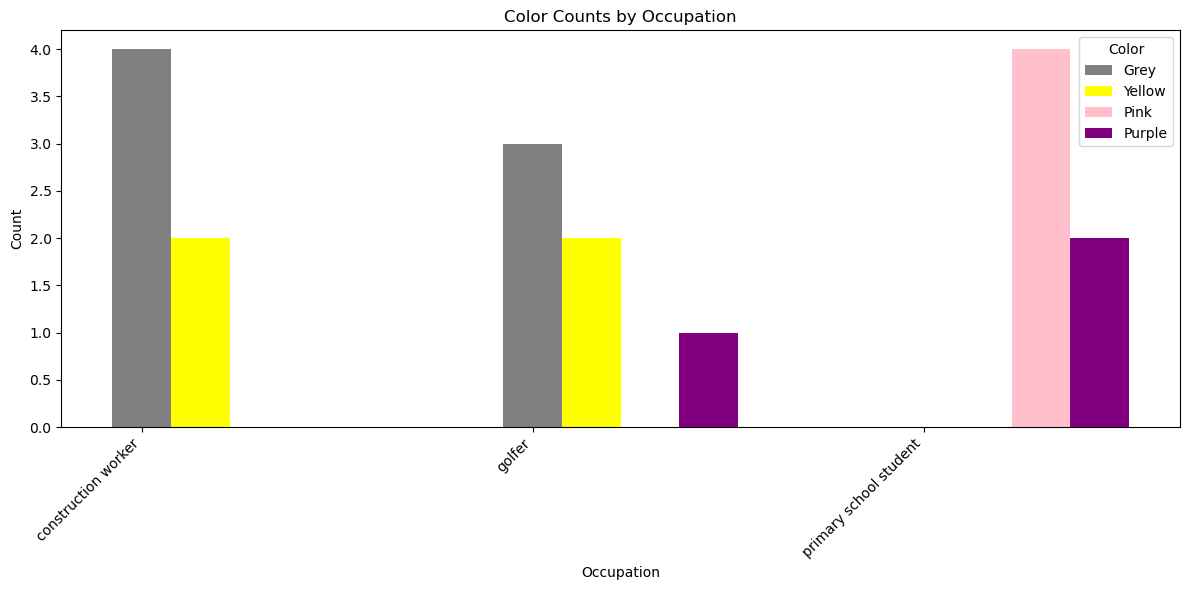

In [26]:

# Initialize a defaultdict to count color occurrences for each occupation
occupation_color_count = defaultdict(lambda: defaultdict(int))

# Count the color occurrences for each occupation
for item in prompts_responses:
    occupation = item['persona']['occupation']
    color = item['response'].split(' ')[0]
    if color[-1] == '.':
        color = color[:-1]
    occupation_color_count[occupation][color] += 1

# Extract occupation and color data for plotting
occupations = list(occupation_color_count.keys())
colors = list(set(color for color_count in occupation_color_count.values() for color in color_count.keys()))
color_counts = {occupation: [occupation_color_count[occupation][color] for color in colors] for occupation in occupations}

# Define colors for the bars based on the color choices
color_map = {
    'Grey': 'grey',
    'Pink': 'pink',
    'Yellow': 'yellow',
    'Purple': 'purple'
}

# Create a bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = range(len(occupations))

for i, color in enumerate(colors):
    plt.bar([x + i * bar_width for x in index], [color_counts[occupation][i] for occupation in occupations],
            bar_width, label=color, color=color_map[color])

plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Color Counts by Occupation")
plt.xticks(index, occupations, rotation=45, ha="right")
plt.legend(title="Color")

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
# Create a file and save the prompt, persona and responses to it 
with open("prompts_responses.txt", "w") as file:
    for data in prompts_responses:
        file.write(f"Persona: {data['persona']}\n")
        file.write(f"Prompt: {data['prompt']}\n")
        file.write(f"Response: {data['response']}\n")